<a href="https://colab.research.google.com/github/sevvaluluss/Artificial-Intelligence-Lesson-/blob/main/Lab_03_Sevval_Ulus_Memis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-x40: Lab 3

**Sevval Ulus Memis**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (440 or 640) and by replacing "**Student Name**" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to download the `aitools` course package.

In [1]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

Run the cell below to import the necessary tools for this assignment. **No other import statements are required for this Lab, and no other import statements should be included in this assignment.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from aitools.algs import play_game, tournament
from aitools.algs import RandomPlayer, GreedyPlayer, MinimaxPlayer
from aitools.envs import Oware

# Part 1: Playing Individual Games

In Part 1, you will then run a few sample games of Oware with different agents playing against each other.

## 1.A - Checking Heuristic Values

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player 1'`.
* An instance of the `RandomPlayer` agent named `'Random Player 2'`.

Use the `play_game()` function to have the agents play 50 turns of a game of Oware, setting `random_state=1`. Leave `display_flags` with its default value. Use the `display()` method of the `Oware` class to display the game state after 50 moves. **Note: You should display the last game state, not the initial state.**

Then print the heuristic value of the current game state from the perspective of each player, along with messages like this shown below:

    Estimated board value for Player 1 is: ____
    Estimated board value for Player 2 is: ____

In [3]:
env = Oware()

player1 = RandomPlayer("Random Player 1")
player2 = RandomPlayer("Random Player 2")

play_game(env, [player1, player2], max_turns=50, random_state=1)

env.display()

h1 = env.heuristic(1)
h2 = env.heuristic(2)

print("Estimated board value for Player 1 is:", h1)
print("Estimated board value for Player 2 is:", h2)

+-------------------+
|  4  4  4  4  4  4 | Player 1: 0 points
|  4  4  4  4  4  4 | Player 2: 0 points
+-------------------+

Estimated board value for Player 1 is: 0
Estimated board value for Player 2 is: 0


## 1.B - Random vs Random

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player 1'`.
* An instance of the `RandomPlayer` agent named `'Random Player 2'`.

Use the `play_game()` function to have the agents play a complete game of Oware. Set `random_state=1` and `display_flags='wt'` when calling `play_game()`. Use the `display()` method of the `Oware` class to display the final game state. **Note: You should display the final game state, not the initial state.**


In [4]:
env = Oware()

player1 = RandomPlayer("Random Player 1")
player2 = RandomPlayer("Random Player 2")

play_game(env, [player1, player2], random_state=1, display_flags='wt')

env.display()

Player 1 (Random Player 1) wins!
Player 1 took 0.0030 seconds.
Player 2 took 0.0024 seconds.
+-------------------+
|  4  4  4  4  4  4 | Player 1: 0 points
|  4  4  4  4  4  4 | Player 2: 0 points
+-------------------+



## 1.C - Random vs Greedy

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player'`.
* An instance of the `GreedyPlayer agent` named `'Greedy Player'`.

Use the `play_game()` function to have the agents play a complete game of Oware with the `RandomPlayer` agent playing first. Set `random_state=1` and `display_flags='wt'` when calling `play_game()`. Use the `display()` method of the `Oware` class to display the final game state. **Note: You should display the final game state, not the initial state.**

In [5]:
env = Oware()

player1 = RandomPlayer("Random Player")
player2 = GreedyPlayer("Greedy Player")

play_game(env, [player1, player2], random_state=1, display_flags='wt')

env.display()

Player 2 (Greedy Player) wins!
Player 1 took 0.0009 seconds.
Player 2 took 0.0042 seconds.
+-------------------+
|  4  4  4  4  4  4 | Player 1: 0 points
|  4  4  4  4  4  4 | Player 2: 0 points
+-------------------+



## 1.D - Greedy vs Minimax

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `GreedyPlayer` agent named `'Greedy Player'`.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax Player'`.

Use the `play_game()` function to have the agents play a complete game of Oware with the `GreedyPlayer` agent playing first. Set `random_state=1` and `display_flags='wt'` when calling `play_game()`. Use the `display()` method of the `Oware` class to display the final game state. **Note: You should display the final game state, not the initial state.**

In [6]:
env = Oware()

player1 = GreedyPlayer("Greedy Player")
player2 = MinimaxPlayer(depth=3, name="Minimax Player")

play_game(env, [player1, player2], random_state=1, display_flags='wt')

env.display()

Player 2 (Minimax Player) wins!
Player 1 took 0.0068 seconds.
Player 2 took 0.0741 seconds.
+-------------------+
|  4  4  4  4  4  4 | Player 1: 0 points
|  4  4  4  4  4  4 | Player 2: 0 points
+-------------------+



# Part 2: Running Tournaments

In Part 2, you will compare the performance of different agents by having them compete against each other in tournaments.

## 2.A - Random vs Random

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player 1'`.
* An instance of the `RandomPlayer` agent named `'Random Player 2'`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and alternate the starting player between games.


In [7]:
env = Oware()

player1 = RandomPlayer("Random Player 1")
player2 = RandomPlayer("Random Player 2")

tournament(env, [player1, player2], 500, random_state=1, switch_players=True)

100%|██████████| 500/500 [00:09<00:00, 53.33it/s]

Random Player 1 vs. Random Player 2
-----------------------------------
Ties:                    26
Random Player 1 Wins:    250
Random Player 2 Wins:    224
Random Player 1 took:    1.82 seconds
Random Player 2 took:    1.74 seconds
Average number of turns: 112.0


## 2.B - Random vs Greedy

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player'`.
* An instance of the `GreedyPlayer` agent named `'Greedy Player`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and alternate the starting player between games.

**Note:** When specifying the agents for the tournament, please list the `RandomPlayer` agent first.


In [8]:
env = Oware()

player1 = RandomPlayer("Random Player")
player2 = GreedyPlayer("Greedy Player")

tournament(env, [player1, player2], 500, random_state=1, switch_players=True)

100%|██████████| 500/500 [00:05<00:00, 95.63it/s]

Random Player vs. Greedy Player
-------------------------------
Ties:                    7
Random Player Wins:      25
Greedy Player Wins:      468
Random Player took:      0.54 seconds
Greedy Player took:      3.04 seconds
Average number of turns: 44.8


## 2.C - Random vs Minimax

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player'`.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax Player`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and alternate the starting player between games.

**Note:** When specifying the agents for the tournament, please list the `RandomPlayer` agent first.

In [9]:
env = Oware()

player1 = RandomPlayer("Random Player")
player2 = MinimaxPlayer(depth=3, name="Minimax Player")

tournament(env, [player1, player2], 500, random_state=1, switch_players=True)

100%|██████████| 500/500 [00:49<00:00, 10.10it/s]

Random Player vs. Minimax Player
--------------------------------
Ties:                    0
Random Player Wins:      0
Minimax Player Wins:     500
Random Player took:      0.43 seconds
Minimax Player took:     47.59 seconds
Average number of turns: 34.3


## 2.D - Greedy vs Minimax

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `GreedyPlayer` agent named `'Greedy Player'`.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax Player`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and alternate the starting player between games.

**Note:** When specifying the agents for the tournament, please list the `GreedyPlayer` agent first.


In [10]:
env = Oware()

player1 = GreedyPlayer("Greedy Player")
player2 = MinimaxPlayer(depth=3, name="Minimax Player")

tournament(env, [player1, player2], 500, random_state=1, switch_players=True)

100%|██████████| 500/500 [00:48<00:00, 10.30it/s]

Greedy Player vs. Minimax Player
--------------------------------
Ties:                    4
Greedy Player Wins:      0
Minimax Player Wins:     496
Greedy Player took:      2.59 seconds
Minimax Player took:     44.08 seconds
Average number of turns: 38.4


## 2.E - Minimax(2) vs Minimax(3)

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `MinimaxPlayer` agent with `depth=2` named `'Minimax(2) Player`.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax(3) Player`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and alternate the starting player between games.

**Note:** When specifying the agents for the tournament, please list the `MinimaxPlayer` agent with `depth=2` first.

In [11]:
env = Oware()

player1 = MinimaxPlayer(depth=2, name="Minimax(2) Player")
player2 = MinimaxPlayer(depth=3, name="Minimax(3) Player")

tournament(env, [player1, player2], 500, random_state=1, switch_players=True)

100%|██████████| 500/500 [02:56<00:00,  2.82it/s]

Minimax(2) Player vs. Minimax(3) Player
---------------------------------------
Ties:                    29
Minimax(2) Player Wins:  122
Minimax(3) Player Wins:  349
Minimax(2) Player took:  37.92 seconds
Minimax(3) Player took:  132.66 seconds
Average number of turns: 177.8


# Part 3: Exploring Play Order Advantage

Oware is a deterministic game in which both players have complete information about the game state at all times. For any turn-based game with these characteristics, one of the following conditions will be true:

1. The first player will always win if playing optimally.
2. The second player will always win if playing optimally.
3. The game will be a draw if both players are playing optimally.

For example, [tic-tac-toe](https://en.wikipedia.org/wiki/Tic-tac-toe) always ends in a draw if both players are playing optimally, but the first player will always win [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) if playing optimally. You can read more about this concept here: [Wikipedia: First-player and second-player win](https://en.wikipedia.org/wiki/First-player_and_second-player_win)

It is known that the first player will always win in Oware if playing optimally. But our agents should not be expected to play optimally. In Part 3, you will investigate if any of the agents appear to have an advantage when playing either first or second. We will explore this by running tournaments in which a specific agent will play against itself without changing the player order between games.

## 3.A - Random Agent and Turn Order Advantage

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `RandomPlayer` agent named `'Random Player 1'`.
* An instance of the `RandomPlayer` agent named `'Random Player 2'`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and **DO NOT** alternate the starting player between games.


In [12]:
env = Oware()

player1 = RandomPlayer("Random Player 1")
player2 = RandomPlayer("Random Player 2")

tournament(env, [player1, player2], 500, random_state=1, switch_players=False)

100%|██████████| 500/500 [00:06<00:00, 73.80it/s]

Random Player 1 vs. Random Player 2
-----------------------------------
Ties:                    26
Random Player 1 Wins:    234
Random Player 2 Wins:    240
Random Player 1 took:    1.31 seconds
Random Player 2 took:    1.29 seconds
Average number of turns: 112.0


## 3.B - Greedy Agent and Turn Order Advantage

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `GreedyPlayer` agent named `'Greedy Player 1'`.
* An instance of the `GreedyPlayer` agent named `'Greedy Player 2'`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and **DO NOT** alternate the starting player between games.

In [13]:
env = Oware()

player1 = GreedyPlayer("Greedy Player 1")
player2 = GreedyPlayer("Greedy Player 2")

tournament(env, [player1, player2], 500, random_state=1, switch_players=False)

100%|██████████| 500/500 [00:08<00:00, 62.14it/s]

Greedy Player 1 vs. Greedy Player 2
-----------------------------------
Ties:                    34
Greedy Player 1 Wins:    194
Greedy Player 2 Wins:    272
Greedy Player 1 took:    3.03 seconds
Greedy Player 2 took:    2.98 seconds
Average number of turns: 49.8


## 3.C - Minimax(2) Agent and Turn Order Advantage

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `MinimaxPlayer` agent with `depth=2` named `'Minimax Player 1'`.
* An instance of the `MinimaxPlayer` agent with `depth=2` named `'Minimax Player 2'`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and **DO NOT** alternate the starting player between games.

In [14]:
env = Oware()

player1 = MinimaxPlayer(depth=2, name="Minimax Player 1")
player2 = MinimaxPlayer(depth=2, name="Minimax Player 2")

tournament(env, [player1, player2], 500, random_state=1, switch_players=False)

100%|██████████| 500/500 [02:12<00:00,  3.76it/s]

Minimax Player 1 vs. Minimax Player 2
-------------------------------------
Ties:                    23
Minimax Player 1 Wins:   226
Minimax Player 2 Wins:   251
Minimax Player 1 took:   61.60 seconds
Minimax Player 2 took:   60.77 seconds
Average number of turns: 273.3


## 3.D - Minimax(3) Agent and Turn Order Advantage

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax Player 1'`.
* An instance of the `MinimaxPlayer` agent with `depth=3` named `'Minimax Player 2'`.

Use the `tournament()` function to have the agents play 500 games of Oware. Set `random_state=1` and **DO NOT** alternate the starting player between games.

In [15]:
env = Oware()

player1 = MinimaxPlayer(depth=3, name="Minimax Player 1")
player2 = MinimaxPlayer(depth=3, name="Minimax Player 2")

tournament(env, [player1, player2], 500, random_state=1, switch_players=False)

100%|██████████| 500/500 [03:30<00:00,  2.37it/s]

Minimax Player 1 vs. Minimax Player 2
-------------------------------------
Ties:                    34
Minimax Player 1 Wins:   199
Minimax Player 2 Wins:   267
Minimax Player 1 took:   103.66 seconds
Minimax Player 2 took:   101.42 seconds
Average number of turns: 156.4


# Part 4: Effects of Alpha-Beta Pruning

In Part 4, you will compare the results and runtimes for MiniMax players with and without alpha-beta pruning.

We will start by verifying that the MiniMax agent produces the same results whether or not alpha-beta pruning is used. This is done in Parts 4.A and 4.B.

## 4.A - Minimax (2) vs Minimax (3), without ABP

Create the following objects:
* An instance of the `Oware` environment.
* An instance of the `MinimaxPlayer` agent with `depth=2` and `ABP=False`. Name the agent `'Minimax(2) Player'`.
* An instance of the `MinimaxPlayer` agent with `depth=3` and `ABP=False`. Name the agent `'Minimax(3) Player'`.

Use the `tournament()` function to have the agents play 200 games of Oware. Set `random_state=1` and alternate the starting player between games.




In [16]:
env = Oware()

player1 = MinimaxPlayer(depth=2, ABP=False, name="Minimax(2) Player")
player2 = MinimaxPlayer(depth=3, ABP=False, name="Minimax(3) Player")

tournament(env, [player1, player2], 200, random_state=1, switch_players=True)

100%|██████████| 200/200 [01:22<00:00,  2.43it/s]

Minimax(2) Player vs. Minimax(3) Player
---------------------------------------
Ties:                    12
Minimax(2) Player Wins:  46
Minimax(3) Player Wins:  142
Minimax(2) Player took:  16.30 seconds
Minimax(3) Player took:  63.42 seconds
Average number of turns: 180.0


## 4.B - Minimax (2) vs Minimax (3), with ABP

Repeat the instructions from 4.A, but this time set `ABP=True` for the two agents. You should see that the results of the tournament are exactly the same regardless of whether or not ABP is used. The search times for the algorithms should be somewhat different, however.

In [17]:
env = Oware()

player1 = MinimaxPlayer(depth=2, ABP=True, name="Minimax(2) Player")
player2 = MinimaxPlayer(depth=3, ABP=True, name="Minimax(3) Player")

tournament(env, [player1, player2], 200, random_state=1, switch_players=True)

100%|██████████| 200/200 [01:12<00:00,  2.75it/s]

Minimax(2) Player vs. Minimax(3) Player
---------------------------------------
Ties:                    12
Minimax(2) Player Wins:  46
Minimax(3) Player Wins:  142
Minimax(2) Player took:  15.60 seconds
Minimax(3) Player took:  54.54 seconds
Average number of turns: 180.0


## 4.C - Search Time with and Without ABP

We will now more thoroughly explore the impact that alpha-beta pruning has on search time. We will run several 10-game tournaments between a Random Player and a Minimax player. For each Minimax depth from 2 to 6, we will run two tournament: One with ABP and one without ABP. For each tournament, we will store the total search time for the Minimax player into one of two lists, which will be named `without_ABP` and `with_ABP`.

Code has been provided for you for this task. Run the cell below as-is. This cell will likely take around 3-4 minutes to run.

In [18]:
%%time
without_ABP = []
with_ABP = []

game = Oware()
for d in [2,3,4,5,6]:
    print(f'Running tournaments with d={d}')
    p1 = RandomPlayer('Random')
    p2 = MinimaxPlayer('Minimax', depth=d, ABP=False)
    p3 = MinimaxPlayer('Minimax', depth=d, ABP=True)

    results = tournament(
        game, [p1, p2], rounds=10, display_results=False, return_results=True
    )
    without_ABP.append(results['play_time'][2])

    results = tournament(
        game, [p1, p3], rounds=10, display_results=False, return_results=True
    )
    with_ABP.append(results['play_time'][2])


Running tournaments with d=2
Running tournaments with d=3
Running tournaments with d=4
Running tournaments with d=5
Running tournaments with d=6
CPU times: user 3min 32s, sys: 150 ms, total: 3min 32s
Wall time: 3min 33s


## 4.D - Plotting Results

Use Matplotlib to create a figure illustrating the runtimes for each Minimax agent in Task D. The figure should adhere to the following specifications:

* It should contain two linesplots on the same set of axes. One lineplot will represent values in `without_ABP` and the other will represent values in `with_ABP`.
* The horizontal axis should indicate the agent depth (2 - 6).
* The figure should contain a legend to indicate which curve is associated with which agent. Use `Without ABP` and `With ABP` for the labels.
* The horizontal and vertical axes should be labeled as "Minimax Depth" and  "Runtime (in seconds)".
* The plot should display gridlines (use `plt.grid()` for this).

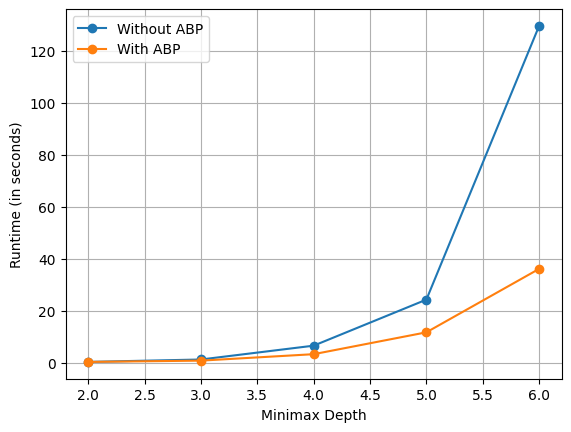

In [19]:
import matplotlib.pyplot as plt

depths = [2, 3, 4, 5, 6]

plt.plot(depths, without_ABP, marker='o', label="Without ABP")
plt.plot(depths, with_ABP, marker='o', label="With ABP")

plt.xlabel("Minimax Depth")
plt.ylabel("Runtime (in seconds)")
plt.legend()
plt.grid()

plt.show()

# Submission Instructions

1. Perform a Restart and Run All by clicking **Runtime > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
